In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import numpy as np
import scipy.stats as st

## Create a 3D plot of bivariate gaussians with intersecting planes

### Make data of bivariate gaussians

In [15]:
#define bivariate gaussian parameters
mu1_x = 4; mu1_y = 3; var1_x = 1; var1_y = 1
mu2_x = 8; mu2_y = 3; var2_x = 3; var2_y = 2
mu3_x = 12; mu3_y = 12; var3_x = .5; var3_y = .5

#define XY plane grid
x = np.linspace(0, 15, 1000)
y = np.linspace(0, 15, 1000)
X, Y = np.meshgrid(x,y)
xyplane = np.empty(X.shape + (2,)) #3D array
xyplane[:,:,0] = X; xyplane[:,:,1] = Y

#create bivariate gaussians
rv1 = st.multivariate_normal([mu1_x, mu1_y, ], [[var1_x, 0], [0, var1_y]])
rv2 = st.multivariate_normal([mu2_x, mu2_y, ], [[var2_x, 0], [0, var2_y]])
rv3 = st.multivariate_normal([mu3_x, mu3_y, ], [[var3_x, 0], [0, var3_y]])
Z = 1.3*rv1.pdf(xyplane) + 3*rv2.pdf(xyplane) + .8*rv3.pdf(xyplane)

### Make plane and point on xy plane data to plot

In [49]:
#idea is to have 6x100x100 array, each pair = single plane. 
#First array is values of plane above gaussian
#second array is values of plane under gaussian, representing area of intersection. Plot with different alphas.
planes = np.empty((6,) + X.shape)
crit_areas = [.1, .15, .2]

#fill order of 3D array is low Z to high Z
for i in range(len(crit_areas)):
    #we will mask on this temp_plane
    temp_plane = np.full(X.shape, crit_areas[i])
    
    #first of pair, plane above gaussian
    planes[2*i,:,:] = np.where(Z < crit_areas[i], crit_areas[i], np.nan)
    
    #second of pair, plane under gaussian
    planes[2*i+1,:,:] = np.where(Z > crit_areas[i], crit_areas[i], np.nan)

#point
point = np.full(X.shape, np.nan)
point[0:500,0:100] = 0

## Plot

/Users/MYK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  app.launch_new_instance()
/Users/MYK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Users/MYK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Z contains NaN values. This may result in rendering artifacts.


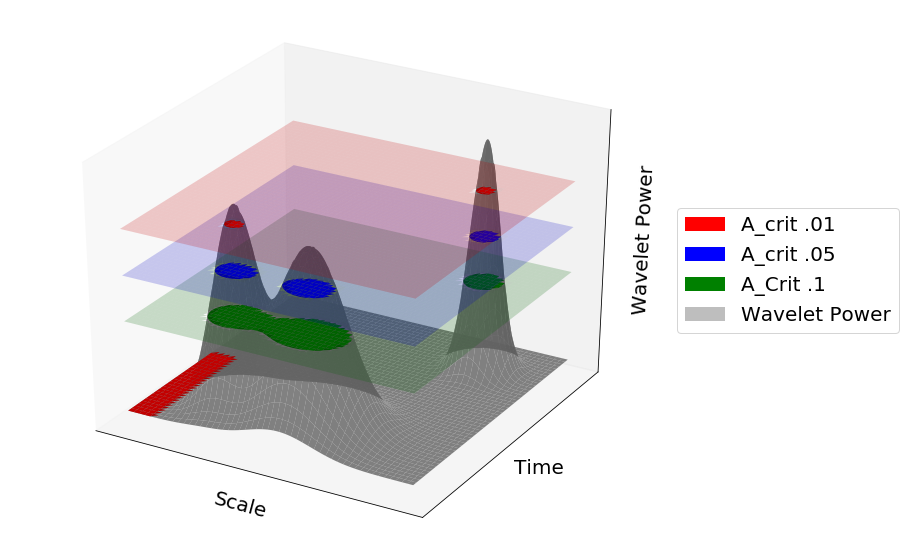

In [50]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection="3d")

#legend parameters, order irrelevant
legends = [Patch(facecolor='r', label='A_crit .01', alpha=1),
           Patch(facecolor='b', label='A_crit .05', alpha=1),
           Patch(facecolor='green', label='A_Crit .1', alpha=1),
           Patch(facecolor='grey', label='Wavelet Power', alpha=.5)]

#plane parameters, low Z to high Z
colors = ['green', 'b', 'r']
alphas = [.2, 1]
labels = ['Alpha .1', 'Alpha .05', 'Alpha .01']

ax.plot_surface(X, Y, Z, linewidth=0, color='grey', alpha=.8)
ax.plot_surface(X, Y, point, linewidth=0, color='r')

for i in range(len(crit_areas)):
    ax.plot_surface(X, Y, planes[2*i,:,:], color=colors[i], alpha=alphas[0], label=labels[i])
    ax.plot_surface(X, Y, planes[2*i+1,:,:], color=colors[i], alpha=alphas[1], label=labels[i])

    
ax.scatter(14, 2, 0, 'x')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('Scale', fontsize=20)
ax.set_ylabel('Time', fontsize=20)
ax.set_zlabel('Wavelet Power', fontsize=20)
plt.legend(handles=legends, loc=(1,.4), prop={'size':20})